# Multilayer Perceptrons to Classify Handwritten Digits

Create a multilayer neural network to correctly classify handwritten digits using the MNIST database.

The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')

%matplotlib inline

## Load the Image Data

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

In [3]:
# Either you download data from BlackBoard - file is mnist-original.mat 
from sklearn.datasets import get_data_home
print(get_data_home())

/Users/a32294/scikit_learn_data


In [4]:
# Or you download it here

In [5]:
mnist = fetch_openml("mnist_784")

In [6]:
# Look at a single digit 
mnist['data'].iloc[0].values

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [7]:
# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target

In [8]:
# This function shows a digit
def showDigit(X,y,index):
    plt.imshow(X.iloc[index].values.reshape(28,28),cmap='Greys')
    print('Label:',y.iloc[index])

In [9]:
X.shape 

(70000, 784)

In [10]:
y.shape

(70000,)

In [11]:
showDigit(X,y,28838)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0/7.0, random_state=42)

Start with a 2 layer x 20 neuron MLP

In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20), max_iter=400, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)

In [14]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.37341106
Iteration 2, loss = 0.19226076
Iteration 3, loss = 0.16519857
Iteration 4, loss = 0.14987032
Iteration 5, loss = 0.13859451
Iteration 6, loss = 0.13302627
Iteration 7, loss = 0.12555098
Iteration 8, loss = 0.11828074
Iteration 9, loss = 0.11518369
Iteration 10, loss = 0.11203432
Iteration 11, loss = 0.11221612
Iteration 12, loss = 0.10929862
Iteration 13, loss = 0.10296393
Iteration 14, loss = 0.10223152
Iteration 15, loss = 0.10006003
Iteration 16, loss = 0.09789164
Iteration 17, loss = 0.09596886
Iteration 18, loss = 0.09692259
Iteration 19, loss = 0.09375461
Iteration 20, loss = 0.09081839
Iteration 21, loss = 0.08914521
Iteration 22, loss = 0.08785684
Iteration 23, loss = 0.08965215
Iteration 24, loss = 0.08445065
Iteration 25, loss = 0.08802386
Iteration 26, loss = 0.08430205
Iteration 27, loss = 0.08272094
Iteration 28, loss = 0.08474609
Iteration 29, loss = 0.08061312
Iteration 30, loss = 0.08180615
Iteration 31, loss = 0.07928617
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.1, max_iter=400,
              random_state=1, solver='sgd', verbose=10)

In [15]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.988133
Test set score: 0.954700


In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [17]:
y_pred = mlp.predict(X_test)

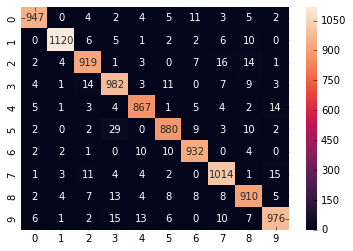

In [18]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d");

Next with a 2 layer x 100 neuron MLP

In [19]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=400, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)

In [ ]:
mlp.fit(X_train, y_train)

In [21]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.997117
Test set score: 0.977100


In [22]:
y_pred = mlp.predict(X_test)

<AxesSubplot:>

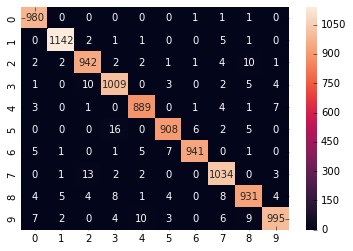

In [23]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [24]:
y_pred

array(['8', '4', '8', ..., '3', '8', '3'], dtype='<U1')

In [25]:
y_test

array(['8', '4', '8', ..., '3', '8', '3'], dtype=object)

In [26]:
for i in range(0,200):
    if y_pred[i] != y_test[i]:
        print("Index:",i)

Index: 47
Index: 59
Index: 78
Index: 180


In [27]:
i = 13
showDigit(X_test,y_test,i)
print("Predicted:",y_pred[i])

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
i = 46
showDigit(X_test,y_test,i)
print("Predicted:",y_pred[i])